# July 17 - VAE contd

In [1]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpls
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random
import torch

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

np.set_printoptions(threshold=np.inf)

def plot_event(run_id, iteration, mode):
    
    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
    
    if mode is "validation":
        np_arr_path = dump_dir + "val_iteration_" + str(iteration) + ".npz"
    else:
        np_arr_path = dump_dir + "iteration_" + str(iteration) + ".npz"
    
    # Load the numpy array
    np_arr = np.load(np_arr_path)
    np_event, np_recon, np_labels, np_energies = np_arr["events"], np_arr["prediction"], np_arr["labels"], np_arr["energies"]

    i = random.randint(0, np_labels.shape[0]-1)
    plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                    label_dict[np_labels[i]], np_energies[i].item(),
                                    show_plot=True)

    plot_utils.plot_charge_hist(torch.tensor(np_event).permute(0,2,3,1).numpy(),
                                np_recon, iteration, num_bins=200)
    
def plot_log(run_id, model_name, iteration, variant, mode):

    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

    # Setup the path to the training log file
    if mode is "training":
        log = dump_dir + "log_train.csv"
    elif mode is "training_validation":
        log = dump_dir + "val_test.csv"
    elif mode is "validation":
        log = dump_dir + "validation_log.csv"
    else:
        print("mode has to be one of training, training_validation, validation")
        return None
    
    downsample_interval = 32 if mode is "training" else None

    if variant is "AE":
        plot_utils.plot_ae_training([log], [model_name], {model_name:["red"]},
                                 downsample_interval=downsample_interval, show_plot=True, legend_loc=(0.8,0.8))
    elif variant is "VAE":
        plot_utils.plot_vae_training([log], [model_name], {model_name:["red", "blue"]},
                                 downsample_interval=downsample_interval, show_plot=True, legend_loc=(0.8,0.8))
        
    if iteration is not None:
        plot_event(run_id, iteration, mode=mode)
        
def plot_samples(run_id, num_samples, model_dir):
    
    dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"
    np_arr_path = dump_dir + "samples/" + model_dir + "/" + str(num_samples) + "_samples.npy"
    
    np_arr = np.load(np_arr_path)
    i, j = random.randint(0, np_arr.shape[0]-1), random.randint(0, np_arr.shape[0]-1)
    
    plot_utils.plot_actual_vs_recon(np_arr[i], np_arr[j], 
                                    "e", 500,
                                    show_plot=True)
    
    plot_utils.plot_charge_hist(np_arr[i],
                                np_arr[j], 0, num_bins=200)

## Setting up the ground for testing the new VAE models which show good performance

In [ ]:
plot_log("20190717_035440", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_035440", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190717_035440", 281, "training_validation")
plot_event("20190717_035440", 140500, "training_validation")
plot_event("20190717_035440", 281000, "training_validation")

In [ ]:
plot_samples("20190717_035440", 32, "ENet_0")
plot_samples("20190717_035440", 64, "ENet_0")

## Further constraining the bottleneck of the VAE since the generated samples are not good

In [ ]:
plot_log("20190717_165800", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_165800", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190717_165800", 1, "training_validation")
plot_event("20190717_165800", 500, "training_validation")
plot_event("20190717_165800", 1000, "training_validation")

In [ ]:
plot_samples("20190717_165800", 32, "ENet_0")
plot_samples("20190717_165800", 64, "ENet_0")

## The above model trained using 720000 samples

In [ ]:
plot_log("20190717_172723", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_172723", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190717_172723", 28, "training_validation")
plot_event("20190717_172723", 14000, "training_validation")
plot_event("20190717_172723", 28000, "training_validation")

In [ ]:
plot_samples("20190717_172723", 32, "ENet_0")
plot_samples("20190717_172723", 64, "ENet_0")

## Constraining the model bottleneck to 64 latent dimensions

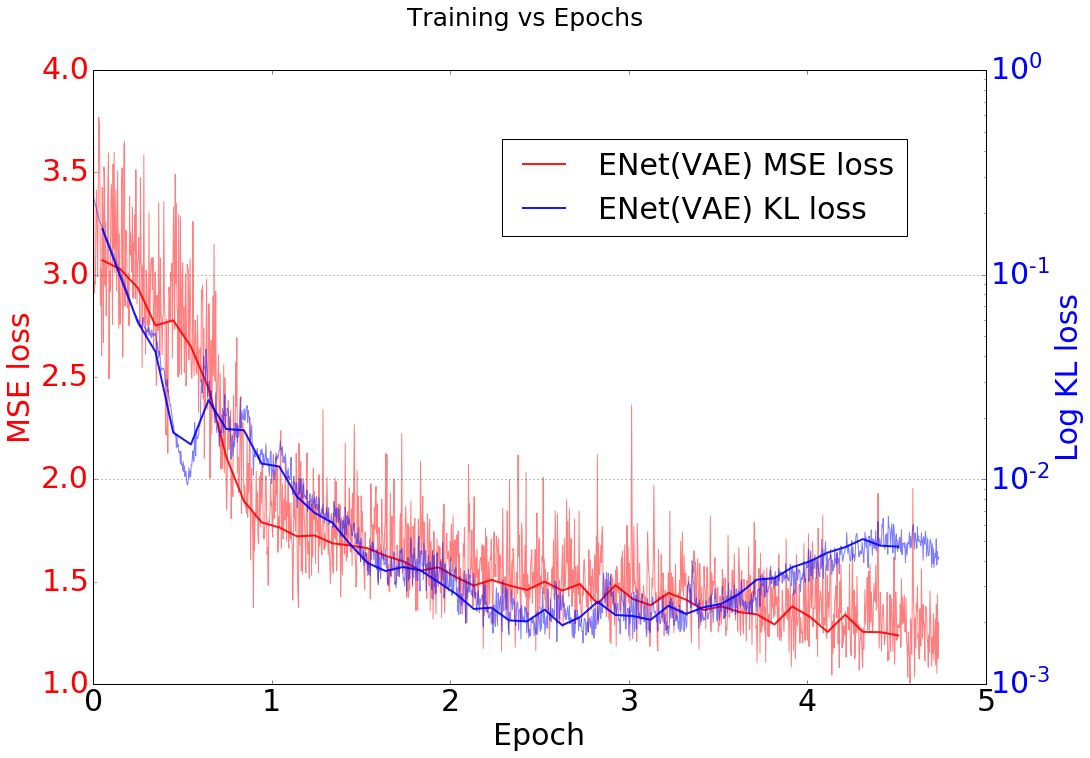

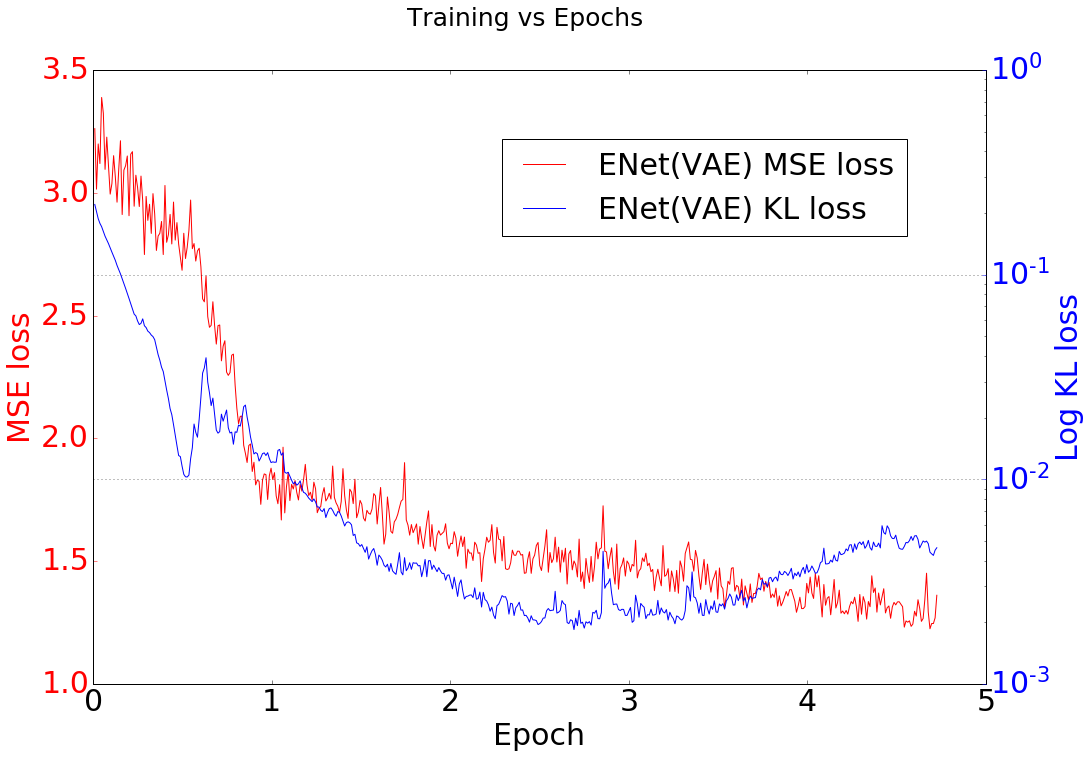

In [2]:
plot_log("20190717_175941", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_175941", "ENet(VAE)", None, "VAE", "training_validation")

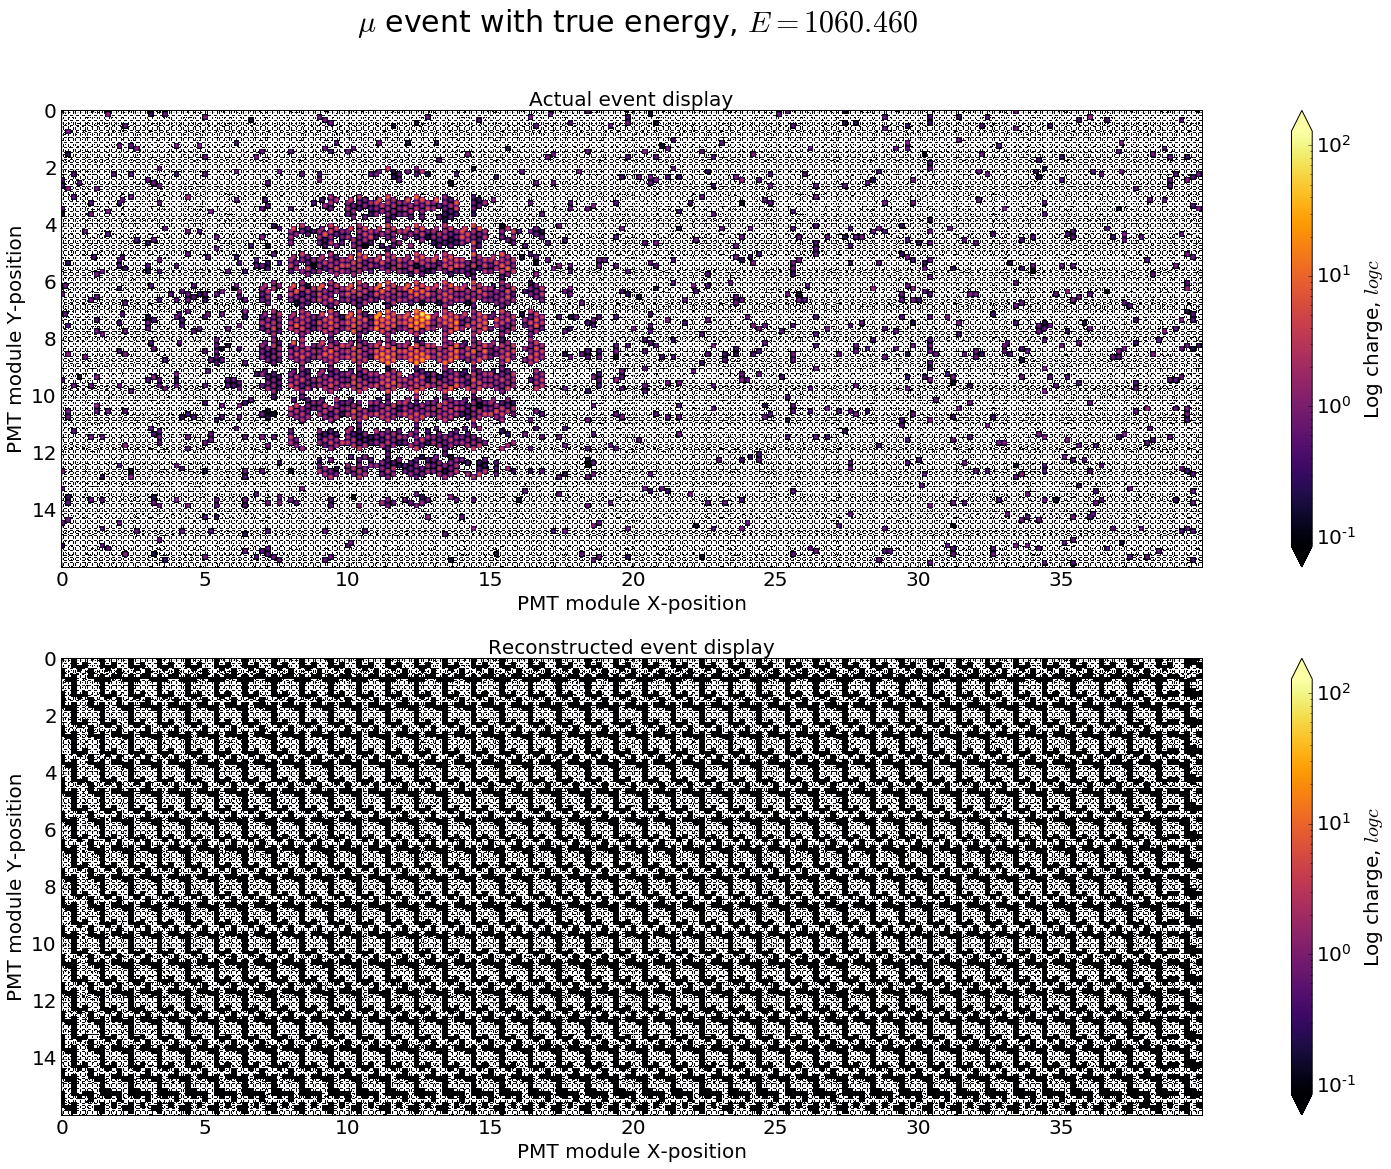

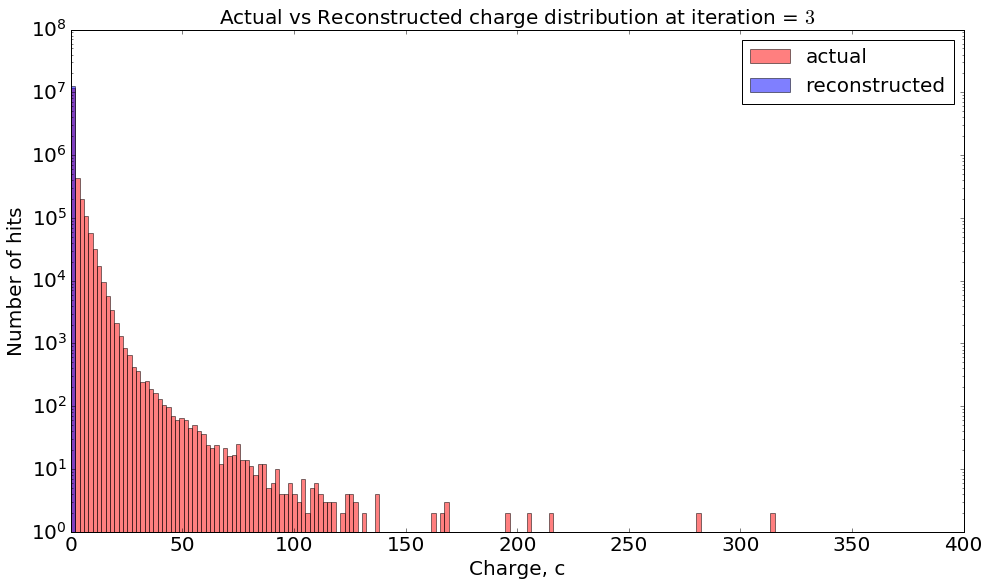

FileNotFoundError: [Errno 2] No such file or directory: '/home/akajal/WatChMaL/VAE/dumps/20190717_175941/iteration_1500.npz'

In [3]:
plot_event("20190717_175941", 3, "training_validation")
plot_event("20190717_175941", 1500, "training_validation")
plot_event("20190717_175941", 3000, "training_validation")

In [ ]:
plot_samples("20190717_175941", 32, "ENet_0")
plot_samples("20190717_175941", 64, "ENet_0")

## Bug in the ENet code which has affected all the previous results

## Repeating the experiment above with the debugged code

In [ ]:
plot_log("20190717_181756", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_181756", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190717_181756", 3, "training_validation")
plot_event("20190717_181756", 1500, "training_validation")
plot_event("20190717_181756", 3000, "training_validation")

In [ ]:
plot_samples("20190717_181756", 32, "ENet_0")
plot_samples("20190717_181756", 64, "ENet_0")

# Adding the bug back in the code and training on the entire dataset to analyze sample quality

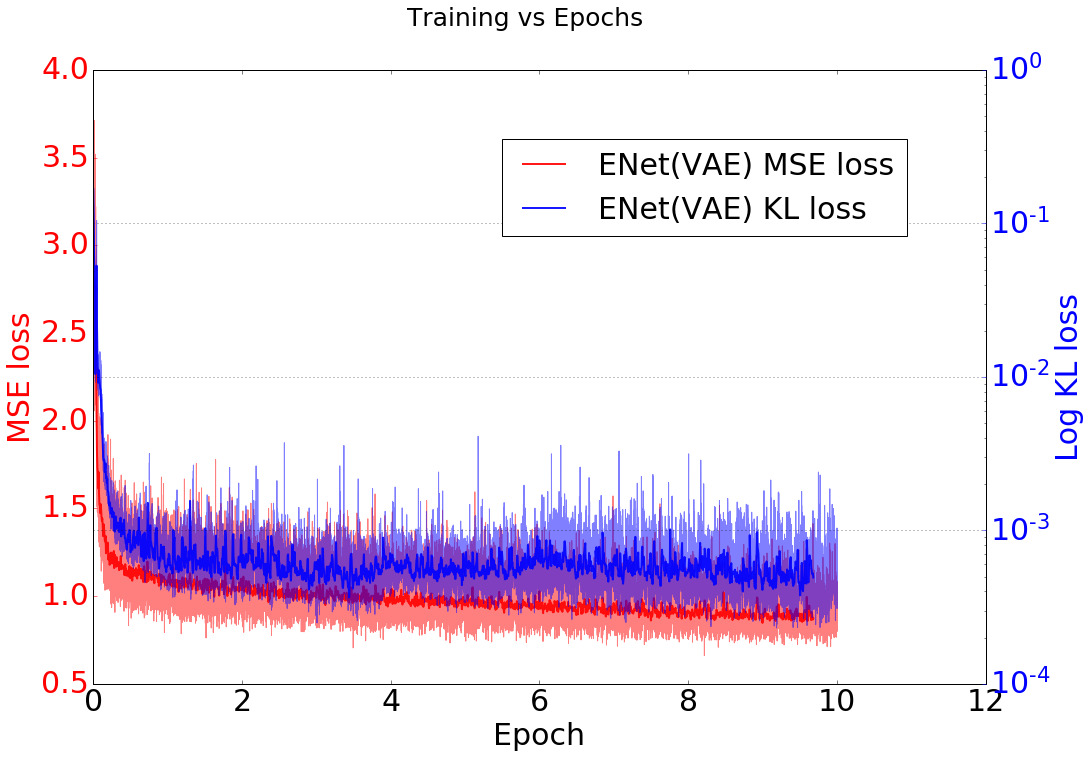

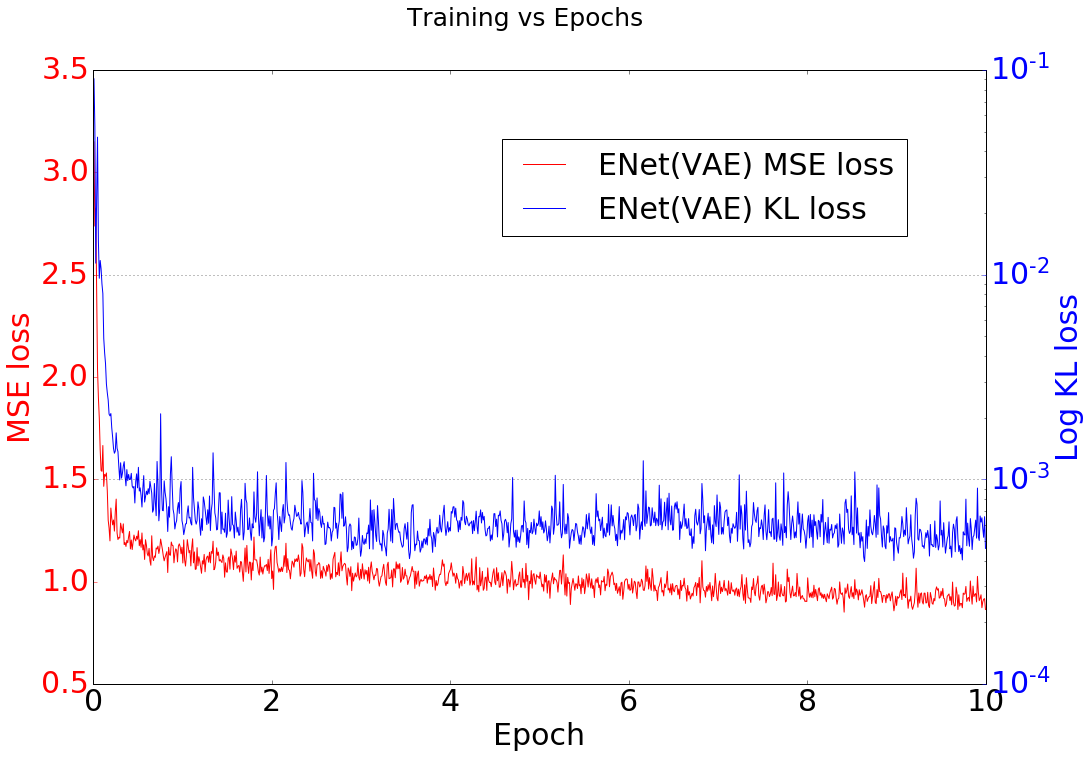

In [4]:
plot_log("20190717_185848", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_185848", "ENet(VAE)", None, "VAE", "training_validation")

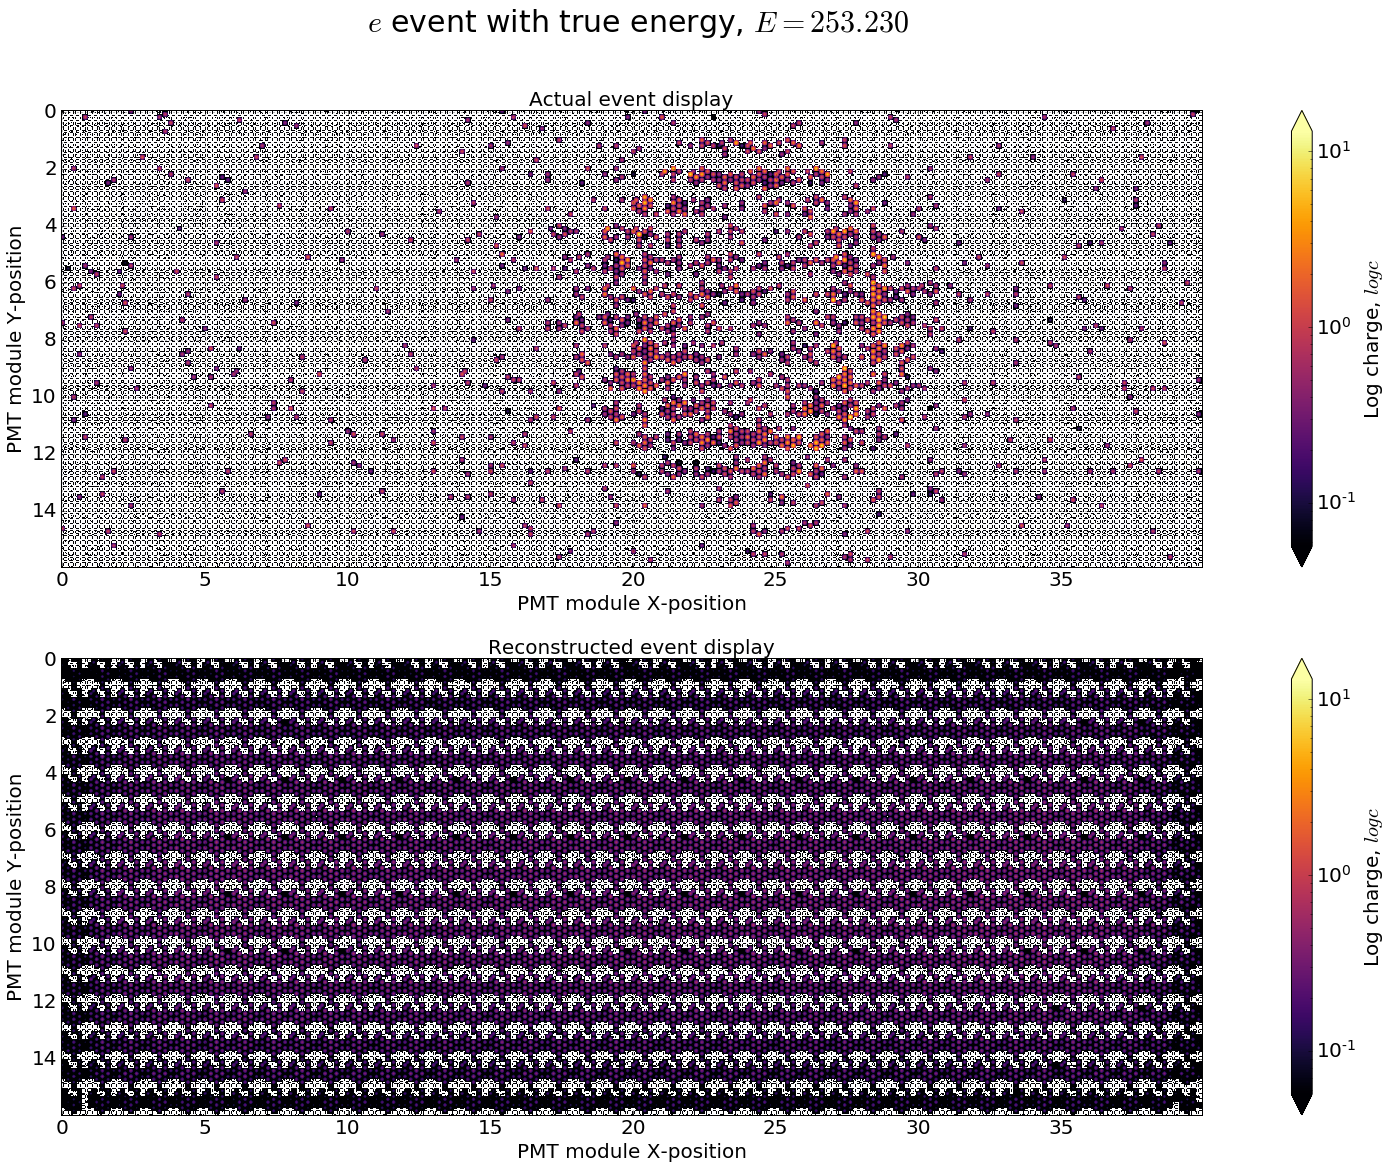

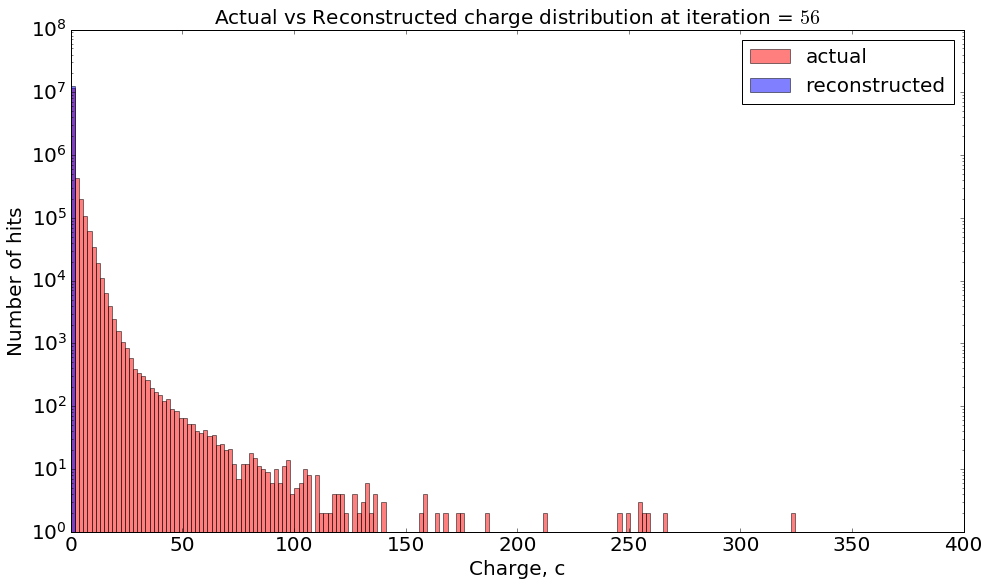

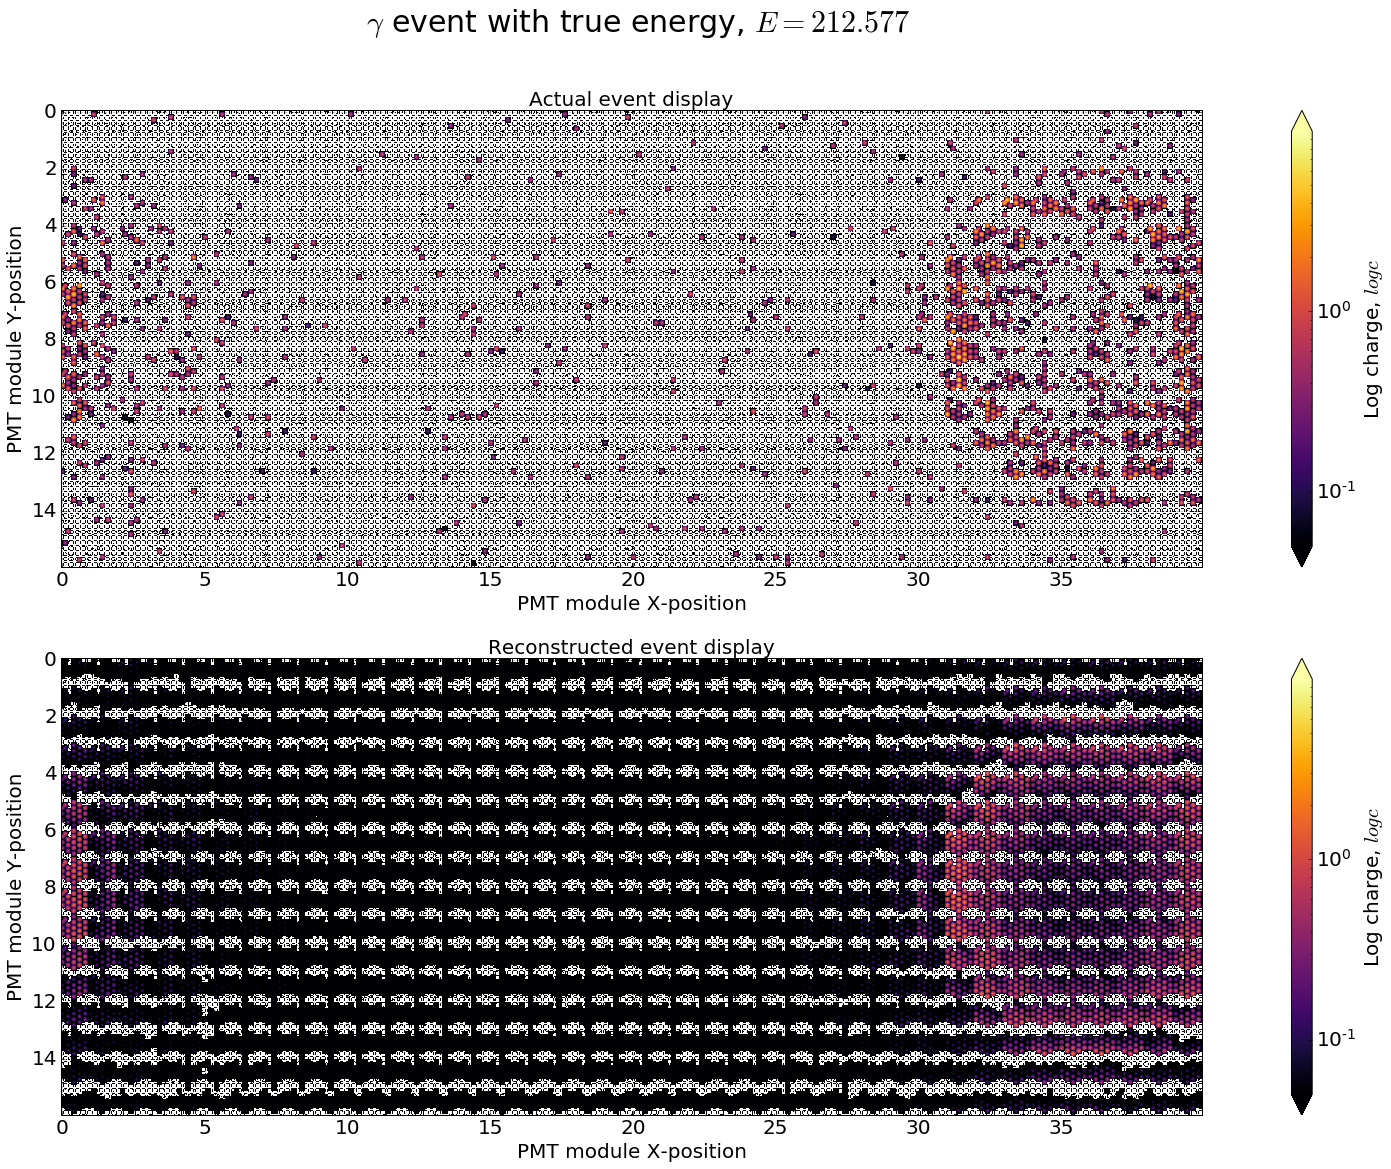

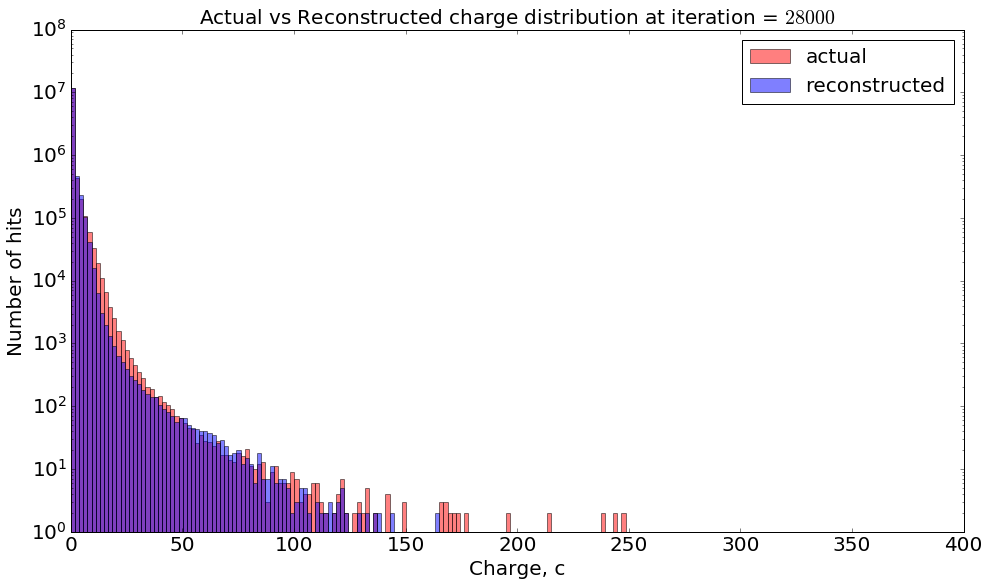

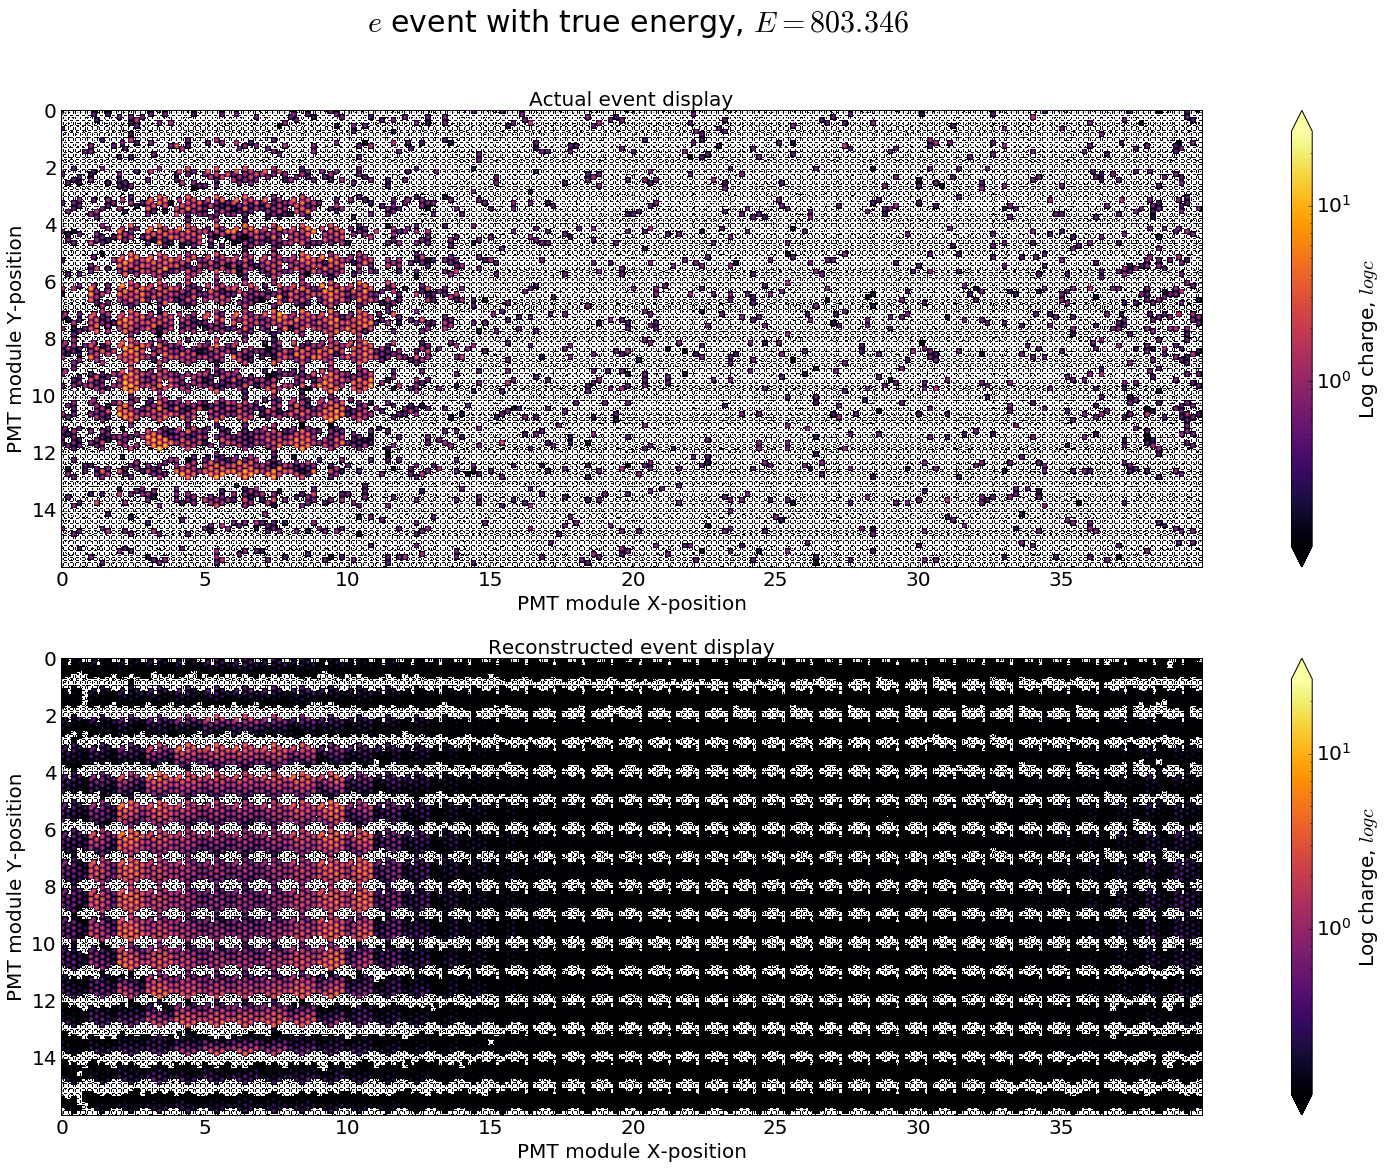

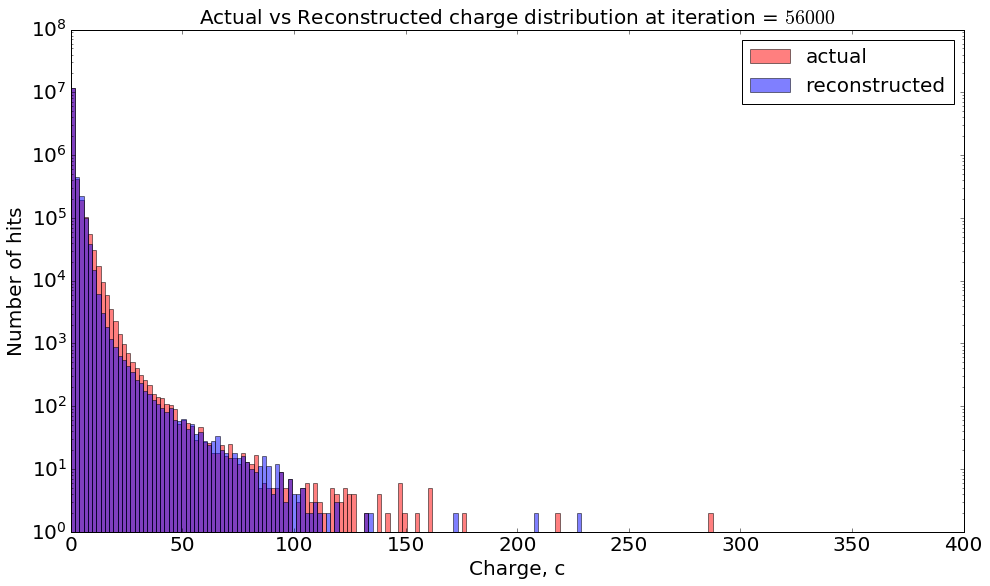

In [5]:
plot_event("20190717_185848", 56, "training_validation")
plot_event("20190717_185848", 28000, "training_validation")
plot_event("20190717_185848", 56000, "training_validation")

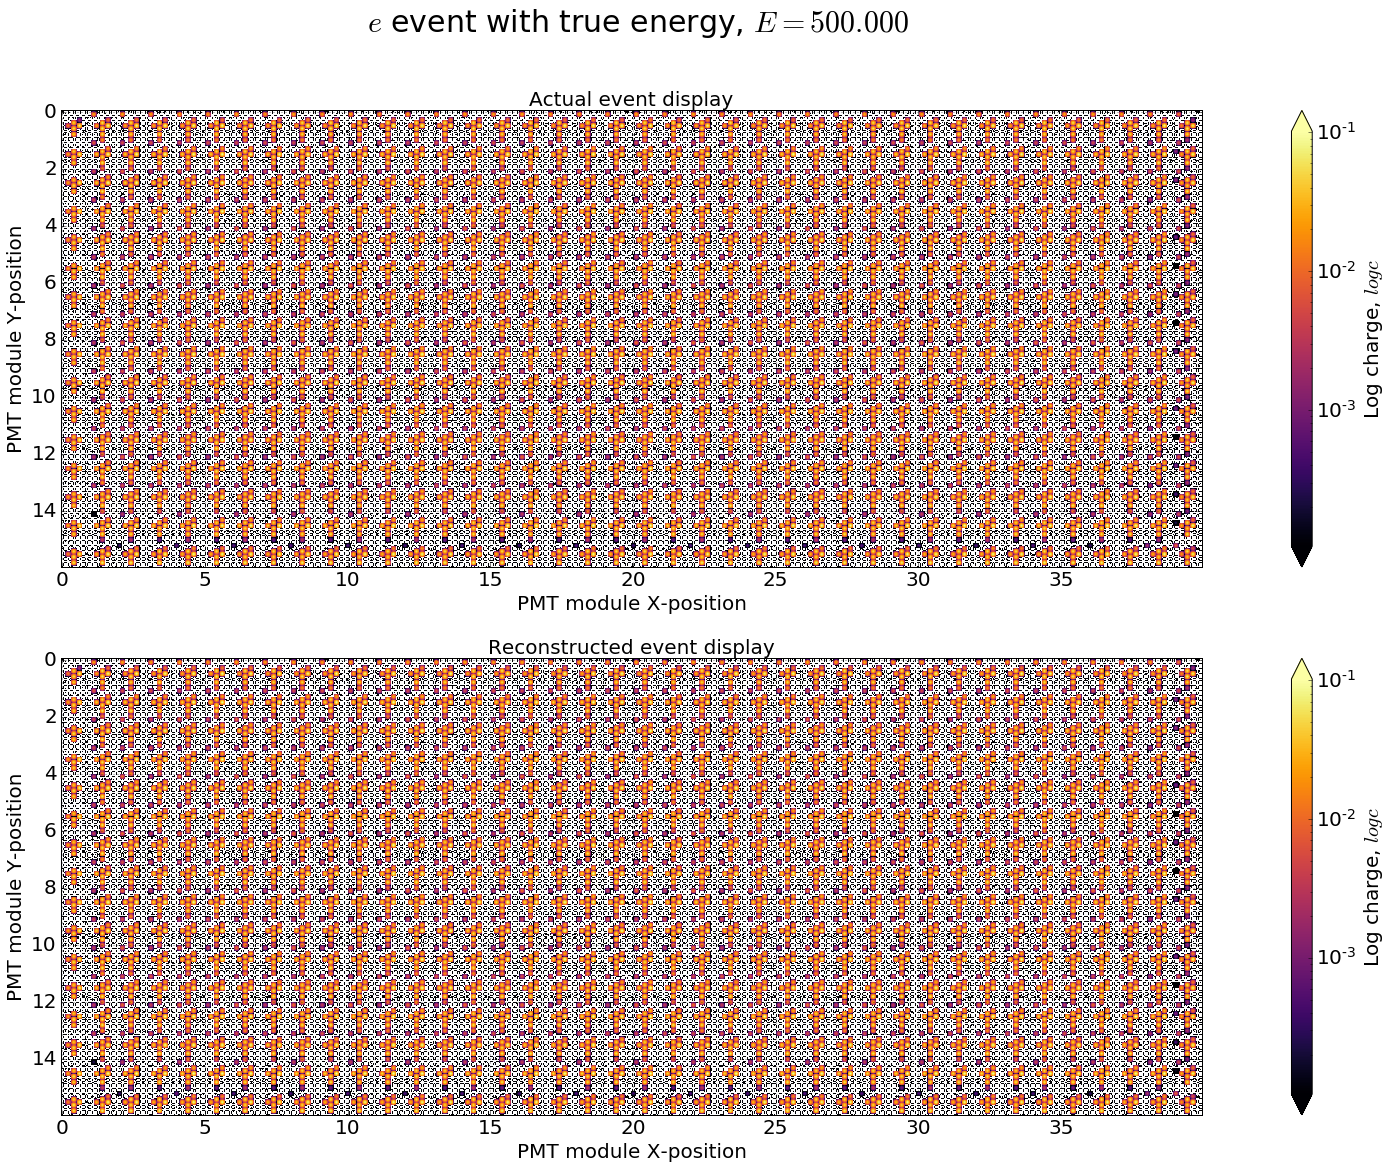

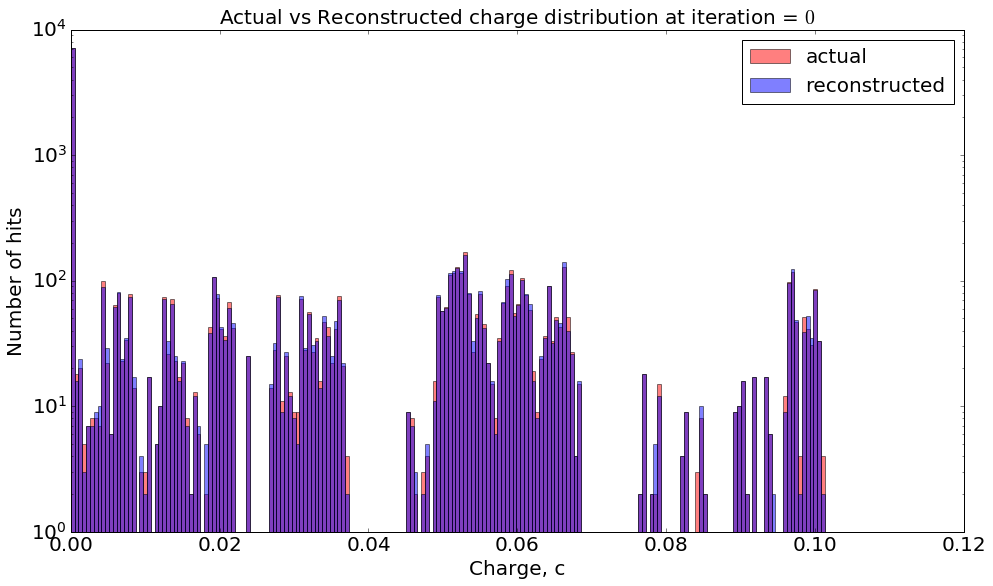

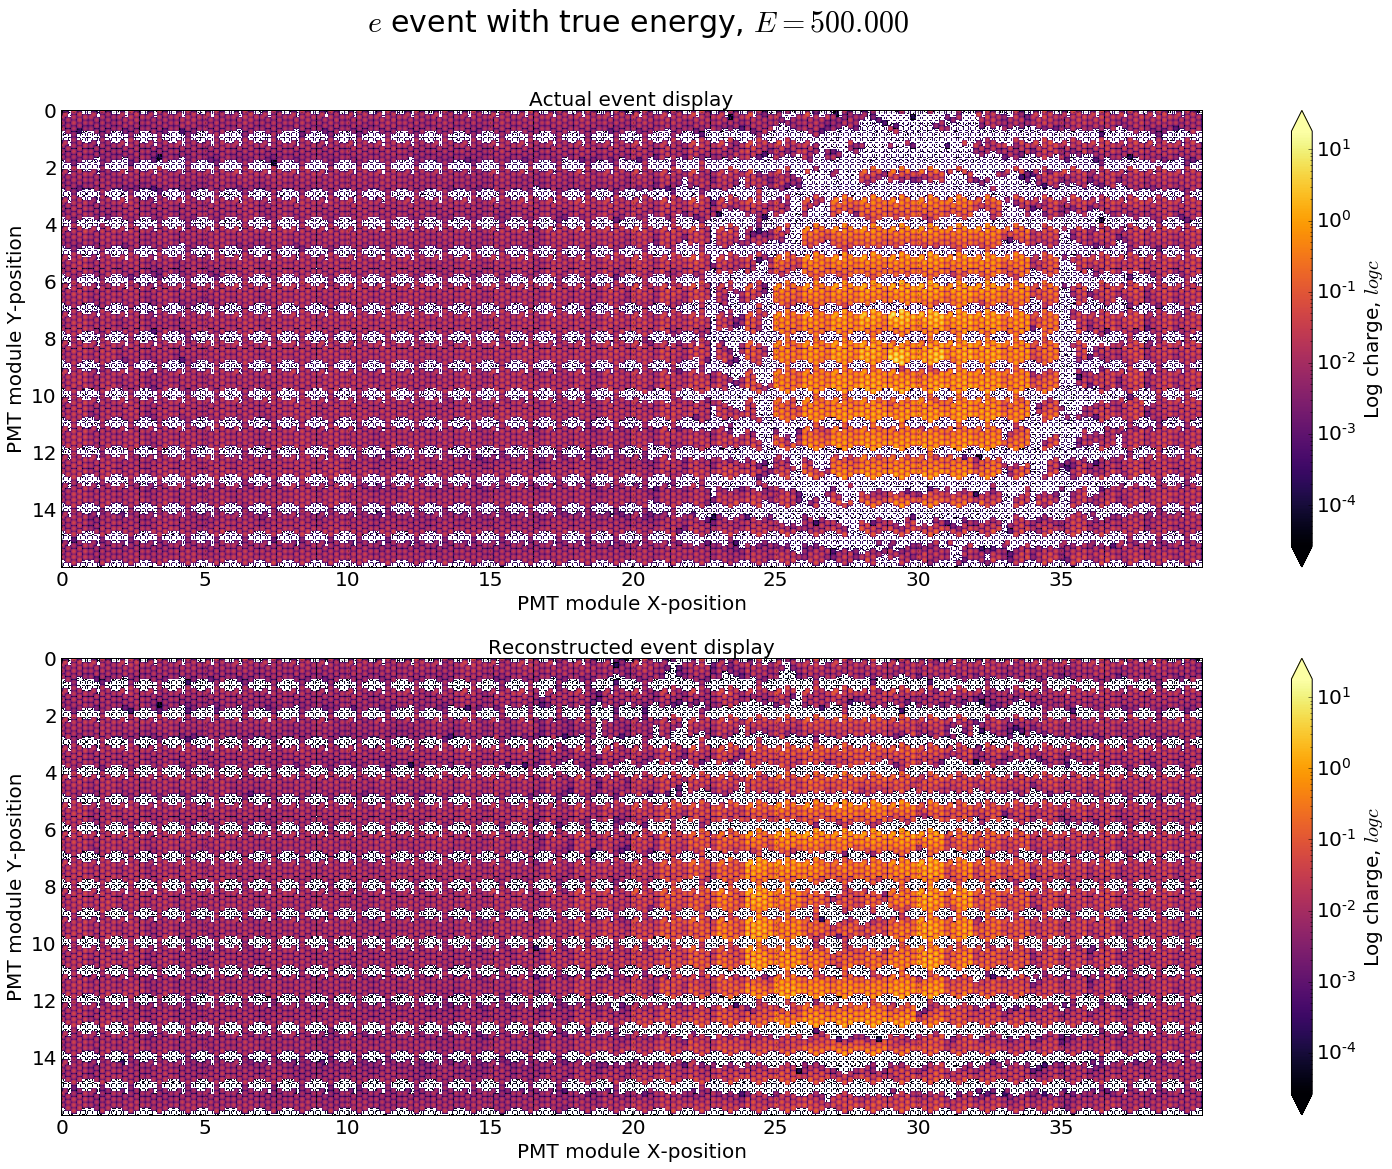

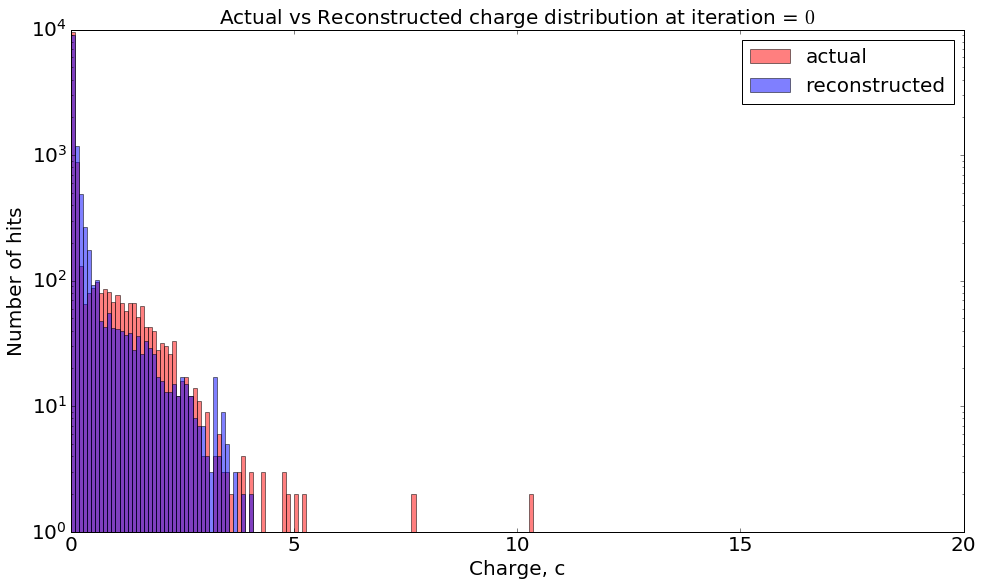

In [6]:
plot_samples("20190717_185848", 32, "ENet_0")
plot_samples("20190717_185848", 64, "ENet_0")

## Good samples, constrain the latent dimensions even more to 32 latent dimensions

In [ ]:
plot_log("20190717_213224", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_213224", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190717_213224", 3, "training_validation")
plot_event("20190717_213224", 1500, "training_validation")
plot_event("20190717_213224", 3000, "training_validation")

In [ ]:
plot_samples("20190717_213224", 32, "ENet_0")
plot_samples("20190717_213224", 64, "ENet_0")

## 32 latent dimensions and 720000 samples

In [ ]:
plot_log("20190717_230647", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_230647", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190717_230647", 56, "training_validation")
plot_event("20190717_230647", 28000, "training_validation")
plot_event("20190717_230647", 56000, "training_validation")

In [ ]:
plot_samples("20190717_230647", 32, "ENet_0")
plot_samples("20190717_230647", 64, "ENet_0")

## 16 latent dimensions and 50000 samples

In [ ]:
plot_log("20190717_230726", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_230726", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190717_230726", 3, "training_validation")
plot_event("20190717_230726", 1500, "training_validation")
plot_event("20190717_230726", 3000, "training_validation")

In [ ]:
plot_samples("20190717_230726", 32, "ENet_0")
plot_samples("20190717_230726", 64, "ENet_0")

## 16 latent dimensions and 720000 samples

In [ ]:
plot_log("20190717_230755", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_230755", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190717_230755", 56, "training_validation")
plot_event("20190717_230755", 28000, "training_validation")
plot_event("20190717_230755", 56000, "training_validation")

In [ ]:
plot_samples("20190717_230755", 32, "ENet_0")
plot_samples("20190717_230755", 64, "ENet_0")

## 8 latent dimensions and 50000 samples

In [ ]:
plot_log("20190717_235044", "ENet(VAE)", None, "VAE", "training")
plot_log("20190717_235044", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190717_235044", 3, "training_validation")
plot_event("20190717_235044", 1500, "training_validation")
plot_event("20190717_235044", 3000, "training_validation")

In [ ]:
plot_samples("20190717_235044", 32, "ENet_0")
plot_samples("20190717_235044", 64, "ENet_0")

## 8 latent dimensions and 720000 samples

In [ ]:
plot_log("20190718_010046", "ENet(VAE)", None, "VAE", "training")
plot_log("20190718_010046", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190718_010046", 56, "training_validation")
plot_event("20190718_010046", 28000, "training_validation")
plot_event("20190718_010046", 56000, "training_validation")

In [ ]:
plot_samples("20190718_010046", 32, "ENet_0")
plot_samples("20190718_010046", 64, "ENet_0")

## 1 latent dimension and 50000 samples

In [ ]:
plot_log("20190718_001157", "ENet(VAE)", None, "VAE", "training")
plot_log("20190718_001157", "ENet(VAE)", None, "VAE", "training_validation")

In [ ]:
plot_event("20190718_001157", 3, "training_validation")
plot_event("20190718_001157", 1500, "training_validation")
plot_event("20190718_001157", 3000, "training_validation")

In [ ]:
plot_samples("20190718_001157", 32, "ENet_0")
plot_samples("20190718_001157", 64, "ENet_0")

## 64 latent dimension and 50000 samples

In [ ]:
plot_log("20190718_015626", "ENet(VAE)", None, "VAE", "training")
plot_log("20190718_015626", "ENet(VAE)", None, "VAE", "training_validation")

plot_event("20190718_015626", 3, "training_validation")
plot_event("20190718_015626", 1500, "training_validation")
plot_event("20190718_015626", 3000, "training_validation")

plot_samples("20190718_015626", 32, "ENet_0")
plot_samples("20190718_015626", 64, "ENet_0")